In [1]:
%load_ext autoreload
%autoreload 2
exec(open("init_notebook.py", "r").read())

current working dirC:\Users\abjawad\Documents\Github\cogmod-driver-behavior-model


In [2]:
import pandas as pd
from analysis.Plot import Plot
from lib.HighD import HighD
from lib.Filter import Filter

In [3]:
data_path = r"C:/Users/abjawad/Documents/GitHub/cogmod-driver-behavior-model/logs/Research_IDM1_COG40_DATA1.csv"
# read file 
simulated_df = pd.read_csv(data_path)
simulated_df.head()

,dataset_id,scenario_id,exec_num,agent_type,frame,scenario_status,ego_id,c_x,c_y,c_speed,...,c_throttle,c_brake,perceived_c_x,perceived_c_y,perceived_c_speed,gaze_direction,preceding_id,a_x,a_y,a_speed
0,1,0,0,idm,5,ScenarioState.PENDING,50,-330.752136,466.18219,0.784,...,0.00,0.0,0.0,0.0,0.0,GazeDirection.CENTER,47,67.464996,0.96,39.55006
1,1,0,0,idm,6,ScenarioState.PENDING,50,-330.752136,466.18219,1.176,...,0.00,0.0,0.0,0.0,0.0,GazeDirection.CENTER,47,67.464996,0.96,39.55006
2,1,0,0,idm,7,ScenarioState.PENDING,50,-330.752136,466.18219,1.568,...,0.00,0.0,0.0,0.0,0.0,GazeDirection.CENTER,47,67.464996,0.96,39.55006
3,1,0,0,idm,8,ScenarioState.PENDING,50,-330.752136,466.18219,1.960,...,0.00,0.0,0.0,0.0,0.0,GazeDirection.CENTER,47,67.464996,0.96,39.55006
4,1,0,0,idm,9,ScenarioState.PENDING,50,-330.752136,466.18219,2.352,...,0.99,0.0,0.0,0.0,0.0,GazeDirection.CENTER,47,67.464996,0.96,39.55006


[0]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


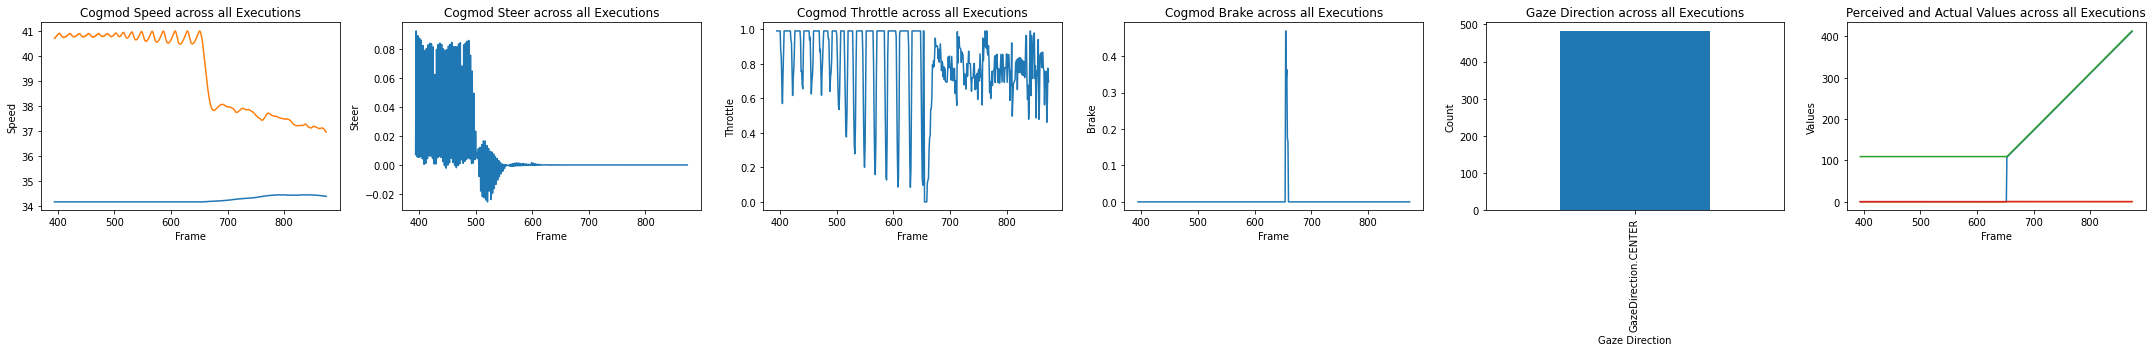

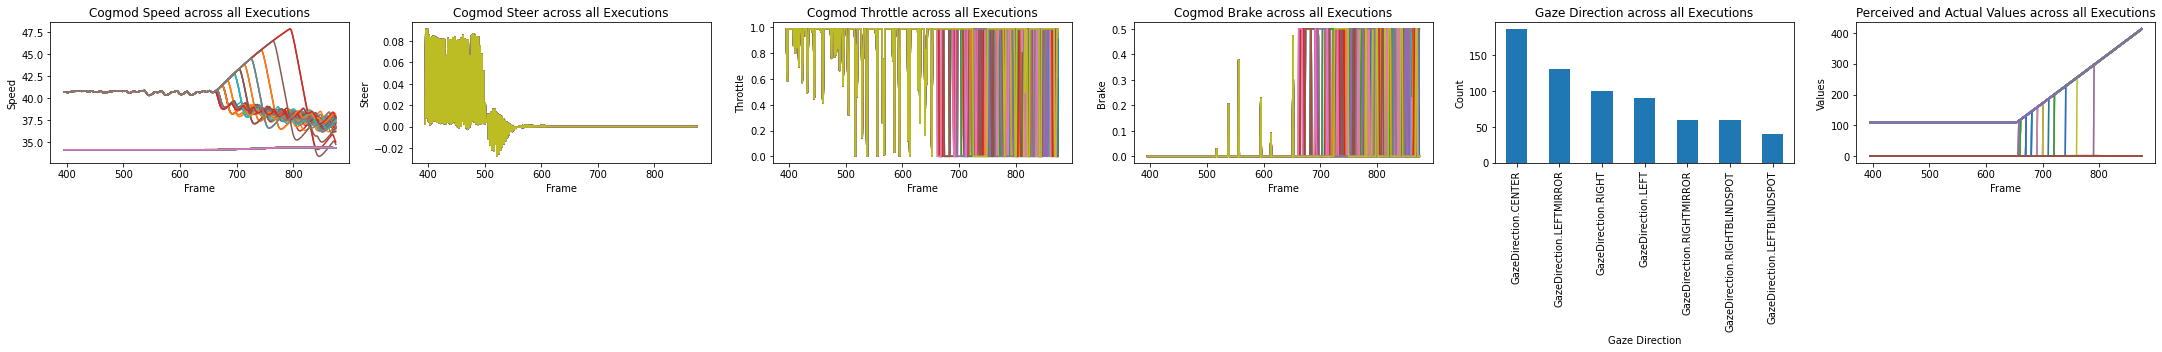

In [4]:
# remove scenario id 2 
from scipy.signal import savgol_filter
scenario_id = 1
simulated_df = simulated_df[simulated_df["scenario_id"] == scenario_id]

# group the simulated data by exec_num
grouped = simulated_df.groupby("exec_num")
# iterate each group
for name, group in grouped:
    group['c_speed'] = savgol_filter(group['c_speed'], 51, 3) # window size 51, polynomial order 3

# ungroup the data
# simulated_df = pd.concat([group for name, group in grouped])

idm_df = simulated_df[(simulated_df["scenario_id"] == scenario_id) & (simulated_df["agent_type"] == 'idm')]
print(idm_df.exec_num.unique()) 

cogmod_df = simulated_df[(simulated_df["scenario_id"] == scenario_id) & (simulated_df["agent_type"] == 'cogmod')]
print(cogmod_df.exec_num.unique()) 

Plot.plot_all_exec_nums(idm_df)
Plot.plot_all_exec_nums(cogmod_df)

In [5]:
HighD_path = r'D:\\highD_data\\highD_dataset'
ids = ["01"]
highD = HighD(ids, HighD_path)

dataset_id = 1
_, tMeta, tracks = highD.get_dataframe_tuple(dataset_id)
df = highD.get_combined_dataframe(dataset_id)
image = highD.get_image(dataset_id)
df.head()

Loaded data and image for dataset 01.


,dataset_id,locationId,frame,id,class,drivingDirection,laneId,x,y,width,...,ttc,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId
0,1,2,1,1,Car,2,5,362.26,21.68,4.85,...,0.0,0.0,0,3,0,0,0,0,0,6
1,1,2,2,1,Car,2,5,363.73,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6
2,1,2,3,1,Car,2,5,365.27,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6
3,1,2,4,1,Car,2,5,366.83,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6
4,1,2,5,1,Car,2,5,368.42,21.68,4.85,...,0.0,0.0,0,14,0,0,0,0,0,6


In [6]:
follow_meta = Filter.filter_vehicle_follow_scenario(df, 
                                      ego_type='Car', 
                                      preceding_type='Car',
                                      minDuration=5, 
                                      minStartDistance=50,
                                      maxStartDistance=100,
                                      removeStrictDistanceInc=True)

print(follow_meta.shape)
follow_meta.head()

Filtering vehicle follow scenario Car Car 5 50 100
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total scenario 10, filtered scenario 5, ratio 0.5
(5, 9)


,dataset_id,ego_id,preceding_id,start_frame,end_frame,duration,start_distance,max_distance,min_distance
2,1,50,47,994,1211,8.68,61.680066,61.850137,50.781906
3,1,386,380,7878,8100,8.88,99.580025,99.580025,51.590035
5,1,680,678,14277,14510,9.32,68.200188,81.370325,68.200188
6,1,976,974,21037,21263,9.04,53.295855,56.650961,53.295855
7,1,1041,1037,22357,22539,7.28,97.970590,101.894064,97.970590


In [7]:
scenario_id = 1
print('scenario id ', scenario_id)
scenario_follow_meta = follow_meta.iloc[scenario_id]
ego_id = int(scenario_follow_meta['ego_id'])
preceding_id = int(scenario_follow_meta['preceding_id'])
start_frame = int(scenario_follow_meta['start_frame'])
end_frame = int(scenario_follow_meta['end_frame'])
print(ego_id, preceding_id, start_frame, end_frame)
print('total frmae ', end_frame - start_frame)

scenario id  1
386 380 7878 8100
total frmae  222


c:\Users\abjawad\AppData\Local\Continuum\anaconda3\envs\carla-vehicle\lib\site-packages\ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


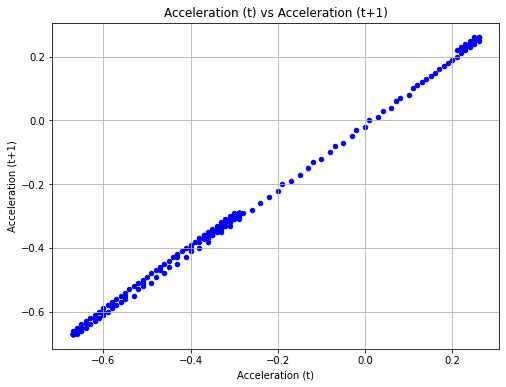

In [8]:

import numpy as np
import matplotlib.pyplot as plt

def plot_ttc(tracks, follow_meta, cMin, cMax):
    # Extract information about the scenario from the follow_meta dataframe
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    ttc_ego = ego_tracks['ttc'].values

    # Clip TTC values between cMin and cMax
    ttc_ego_clipped = np.clip(ttc_ego, cMin, cMax)

    # Normalize TTC values
    ttc_ego_norm = ttc_ego_clipped 

    # Create a plot
    plt.figure(figsize=(10, 5))

    # Plot TTC distribution
    ttc_ego_clipped = ttc_ego_clipped[ttc_ego_clipped != cMin]
    ttc_ego_clipped = ttc_ego_clipped[ttc_ego_clipped != cMax]
    plt.hist(ttc_ego_clipped, bins=25, edgecolor='black', density=True)
    plt.xlabel('TTC Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of TTC for Ego Vehicle')
    plt.show()


def plot_thw(tracks, follow_meta, cMin, cMax):
    # Extract information about the scenario from the follow_meta dataframe
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    thw_ego = ego_tracks['thw'].values

    # Clip TTC values between cMin and cMax
    thw_ego_clipped = np.clip(thw_ego, cMin, cMax)

    # Normalize TTC values
    ttc_ego_norm = thw_ego_clipped 

    # Create a plot
    plt.figure(figsize=(10, 5))

    # Plot TTC distribution
    thw_ego_clipped = thw_ego_clipped[thw_ego_clipped != cMin]
    thw_ego_clipped = thw_ego_clipped[thw_ego_clipped != cMax]
    plt.hist(thw_ego_clipped, bins=10, edgecolor='black', density=True)
    plt.xlabel('THW Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of THW for Ego Vehicle')
    plt.show()



def plot_velocity(tracks, follow_meta):
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']
    
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    velcoity_ego = (ego_tracks['xVelocity'] ** 2 + ego_tracks['yVelocity'] ** 2) ** 0.5
    
    plt.figure(figsize=(10, 5))
    plt.hist(velcoity_ego.values, bins=10,edgecolor='black', density=True)
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.title('Velocity of Ego Vehicle')
    plt.show()

def plot_acceleration_t_t_1(tracks, follow_meta):
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']
    
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    ego_tracks['shifted_xAcceleration'] = ego_tracks['xAcceleration'].shift(-1)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(ego_tracks['xAcceleration'], ego_tracks['shifted_xAcceleration'], s=20, color='blue')
    plt.title('Acceleration (t) vs Acceleration (t+1)')
    plt.xlabel('Acceleration (t)')
    plt.ylabel('Acceleration (t+1)')
    plt.grid(True)
    plt.show()
    pass

# plot_ttc(df, scenario_follow_meta, 0, 200)
# plot_thw(df, scenario_follow_meta, -100, 200)
# plot_velocity(df, scenario_follow_meta)
plot_acceleration_t_t_1(df, scenario_follow_meta)

In [9]:
def calculate_vel_idm(df, exec_no=0):
    velocity = df['c_speed']
    df['velocity'] = velocity
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']  
    return df

def calculate_vel_cogmod(df):
    velocity = df['c_speed']
    df['velocity'] = velocity
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    best_exec = df[df['velocity'] == velocity.max()]['exec_num'].values[0]
    df = df[df['exec_num'] == best_exec]
    return df

def calculate_vel(tracks, follow_meta):
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']
    
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    velcoity_ego = (ego_tracks['xVelocity'] ** 2 + ego_tracks['yVelocity'] ** 2) ** 0.5
    
    return velcoity_ego


def calculate_thw_idm(df, cMin, cMax, exec_no=0):
    
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    thw = distance / df['c_speed']
    df['thw'] = thw
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']

    return df


def calculate_thw_cogmod(df, cMin, cMax):
    
    # df = df[df['scenario_status'] != 'ScenarioState.PENDING']
    # Calculate distance between ego vehicle and preceding vehicle
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    thw = distance / df['c_speed']
    
    df['thw'] = thw
    
    # selecting only the relevant scene/frame
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    best_exec = df[df['thw'] == thw.min()]['exec_num'].values[0]
    print('best exec ', best_exec)
    # selecting only the relevant execution
    df = df[df['exec_num'] == best_exec]
    
    return df

def calculate_thw(tracks, follow_meta, cMin, cMax):
    # Calculate distance between ego vehicle and preceding vehicle
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    thw_ego = ego_tracks['thw'].values
    
    thw_ego = thw_ego[thw_ego < cMax]
    thw_ego = thw_ego[thw_ego > cMin]
    
    return thw_ego



def calculate_ttc_idm(df, cMin, cMax, exec_no=0):
    
    # Calculate distance between ego vehicle and preceding vehicle
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    # Calculate relative speed between ego vehicle and preceding vehicle
    relative_speed = df['c_speed'] - df['a_speed']

    # Avoid division by zero when calculating TTC
    relative_speed = np.where(relative_speed != 0, relative_speed, 1e-6)
    
    # Calculate TTC
    ttc = distance / relative_speed

    # add a new column named 'ttc' to the dataframe
    df['ttc'] = ttc
    
    # selecting only the relevant scene/frame
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    # selecting only the relevant execution
    # df = df[df['exec_num'] == exec_no]

    return df

def calculate_ttc_cogmod(df, cMin, cMax):
    
    # Calculate distance between ego vehicle and preceding vehicle
    distance = np.sqrt((df['c_x'] - df['a_x'])**2 + (df['c_y'] - df['a_y'])**2)

    # Calculate relative speed between ego vehicle and preceding vehicle
    relative_speed = df['c_speed'] - df['a_speed']

    # Avoid division by zero when calculating TTC
    relative_speed = np.where(relative_speed != 0, relative_speed, 1e-6)

    # Calculate TTC
    ttc = distance / relative_speed
    
    df['ttc'] = ttc
    
    # best exec is with lowest ttc
    best_exec = df[df['ttc'] == ttc.min()]['exec_num'].values[0]
    
    # selecting only the relevant scene/frame
    df = df[df['scenario_status'] == 'ScenarioState.RUNNING']
    
    print('best exec ', best_exec)
    # selecting only the relevant execution
    df = df[df['exec_num'] == best_exec]

    return df

def calculate_ttc(tracks, follow_meta, cMin, cMax):
    # Calculate distance between ego vehicle and preceding vehicle
    ego_id = follow_meta['ego_id']
    start_frame = follow_meta['start_frame']
    end_frame = follow_meta['end_frame']

    # Get the relevant tracks for the scenario
    ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]

    # Calculate TTC for ego vehicle
    ttc_ego = ego_tracks['ttc'].values
    
    ttc_ego = ttc_ego[ttc_ego < cMax]
    ttc_ego = ttc_ego[ttc_ego > cMin]
    
    return ttc_ego

best exec  1
best exec  3
vel shape  (222,) (223, 26) (223, 26)
ttc shape  (222,) (223, 26) (223, 26)
thw shape  (222,) (223, 26) (223, 26)


c:\Users\abjawad\AppData\Local\Continuum\anaconda3\envs\carla-vehicle\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\abjawad\AppData\Local\Continuum\anaconda3\envs\carla-vehicle\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\Users\abjawad\AppData\Local\Continuum\anaconda3\envs\carla-vehicle\lib\site-packages

Text(0, 0.5, 'Density')

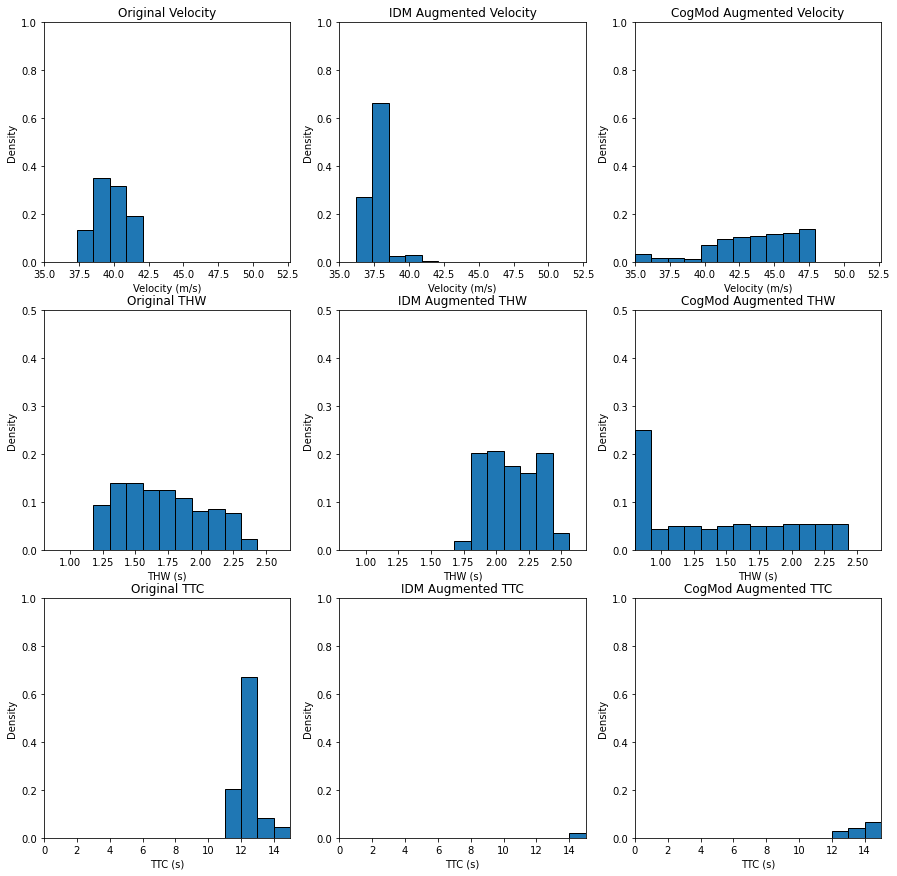

In [13]:
import matplotlib.pyplot as plt

num_bins = 15
# Load or calculate your data
original_velocity = calculate_vel(df, scenario_follow_meta)
original_ttc = calculate_ttc(df, scenario_follow_meta, 0, 200)
original_thw = calculate_thw(df, scenario_follow_meta, 0, 200)

# Perform IDM and COgmod augmentations
idm_velocity = calculate_vel_idm(idm_df, 0)
cogmod_velocity = calculate_vel_cogmod(cogmod_df)

idm_ttc = calculate_ttc_idm(idm_df, 0, 200, exec_no=1)
cogmod_ttc = calculate_ttc_cogmod(cogmod_df, 0, 200)

idm_thw = calculate_thw_idm(idm_df, 0, 200, exec_no=1)
cogmod_thw = calculate_thw_cogmod(cogmod_df, 0, 200)

print("vel shape ", original_velocity.shape, idm_velocity.shape, cogmod_velocity.shape)
print("ttc shape ", original_ttc.shape, idm_ttc.shape, cogmod_ttc.shape)
print("thw shape ", original_thw.shape, idm_thw.shape, cogmod_thw.shape)

max_velocity = max(max(original_velocity), max(idm_velocity['velocity']), max(cogmod_velocity['velocity']))
max_velocity = max_velocity + 0.1*max_velocity
vel_bin_edges = np.linspace(35, max_velocity, num_bins+1)

max_thw = max(max(original_thw), max(idm_thw['thw']), max(cogmod_thw['thw']))
max_thw = max_thw + 0.1*max_thw
thw_bin_edges = np.linspace(0.8, max_thw, num_bins+1)

max_ttc = 15
ttc_bin_edges = np.linspace(0, max_ttc, num_bins+1)



# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plotting velocity
axs[0, 0].hist(original_velocity, weights=np.ones(len(original_velocity))/len(original_velocity), bins=vel_bin_edges, edgecolor='black')
axs[0, 0].set_title('Original Velocity')
axs[0, 0].set_xlim([35, max_velocity])
axs[0, 0].set_ylim([0, 1])
axs[0, 0].set_xlabel('Velocity (m/s)')
axs[0, 0].set_ylabel('Density')

axs[0, 1].hist(idm_velocity['velocity'], weights=np.ones(len(idm_velocity['velocity']))/len(idm_velocity['velocity']), bins=vel_bin_edges, edgecolor='black')
axs[0, 1].set_title('IDM Augmented Velocity')
axs[0, 1].set_xlim([35, max_velocity])
axs[0, 1].set_ylim([0, 1])
axs[0, 1].set_xlabel('Velocity (m/s)')
axs[0, 1].set_ylabel('Density')

axs[0, 2].hist(cogmod_velocity['velocity'], weights=np.ones(len(cogmod_velocity['velocity']))/len(cogmod_velocity['velocity']), bins=vel_bin_edges, edgecolor='black')
axs[0, 2].set_title('CogMod Augmented Velocity')
axs[0, 2].set_xlim([35, max_velocity])
axs[0, 2].set_ylim([0, 1])
axs[0, 2].set_xlabel('Velocity (m/s)')
axs[0, 2].set_ylabel('Density')


axs[1, 0].hist(original_thw, weights=np.ones(len(original_thw))/len(original_thw), bins=thw_bin_edges, edgecolor='black')
axs[1, 0].set_title('Original THW')
axs[1, 0].set_xlim([0.8, max_thw])
axs[1, 0].set_ylim([0, 0.5])
axs[1, 0].set_xlabel('THW (s)')
axs[1, 0].set_ylabel('Density')

axs[1, 1].hist(idm_thw['thw'], weights=np.ones(len(idm_thw['thw']))/len(idm_thw['thw']), bins=thw_bin_edges, edgecolor='black')
axs[1, 1].set_title('IDM Augmented THW')
axs[1, 1].set_xlim([0.8, max_thw])
axs[1, 1].set_ylim([0, 0.5])
axs[1, 1].set_xlabel('THW (s)')
axs[1, 1].set_ylabel('Density')

axs[1, 2].hist(cogmod_thw['thw'], weights=np.ones(len(cogmod_thw['thw']))/len(cogmod_thw['thw']), bins=thw_bin_edges, edgecolor='black')
axs[1, 2].set_title('CogMod Augmented THW')
axs[1, 2].set_xlim([0.8, max_thw])
axs[1, 2].set_ylim([0, 0.5])
axs[1, 2].set_xlabel('THW (s)')
axs[1, 2].set_ylabel('Density')


axs[2, 0].hist(original_ttc, weights=np.ones(len(original_ttc))/len(original_ttc), bins=ttc_bin_edges, edgecolor='black')
axs[2, 0].set_title('Original TTC')
axs[2, 0].set_xlim([0, max_ttc])
axs[2, 0].set_ylim([0, 1])
axs[2, 0].set_xlabel('TTC (s)')
axs[2, 0].set_ylabel('Density')

axs[2, 1].hist(idm_ttc['ttc'], weights=np.ones(len(idm_ttc['ttc']))/len(idm_ttc['ttc']), bins=ttc_bin_edges, edgecolor='black')
axs[2, 1].set_title('IDM Augmented TTC')
axs[2, 1].set_xlim([0, max_ttc])
axs[2, 1].set_ylim([0, 1])
axs[2, 1].set_xlabel('TTC (s)')
axs[2, 1].set_ylabel('Density')

axs[2, 2].hist(cogmod_ttc['ttc'], weights=np.ones(len(cogmod_ttc['ttc']))/len(cogmod_ttc['ttc']), bins=ttc_bin_edges, edgecolor='black')
axs[2, 2].set_title('CogMod Augmented TTC')
axs[2, 2].set_xlim([0, max_ttc])
axs[2, 2].set_ylim([0, 1])
axs[2, 2].set_xlabel('TTC (s)')
axs[2, 2].set_ylabel('Density')

In [11]:

# def calculate_drac(tracks, follow_meta, cMin, cMax):
#     # Calculate distance between ego vehicle and preceding vehicle
#     ego_id = follow_meta['ego_id']
#     preceding_id = follow_meta['preceding_id']
#     start_frame = follow_meta['start_frame']
#     end_frame = follow_meta['end_frame']

#     ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    
#     return ego_tracks

# def plot_drac(tracks, follow_meta):
    
#     ego_id = follow_meta['ego_id']
#     preceding_id = follow_meta['preceding_id']
#     start_frame = follow_meta['start_frame']
#     end_frame = follow_meta['end_frame']

#     # Get the relevant tracks for the scenario
#     ego_tracks = tracks.loc[(tracks['id'] == ego_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
#     preceding_tracks = tracks.loc[(tracks['id'] == preceding_id) & (tracks['frame'] >= start_frame) & (tracks['frame'] < end_frame)]
    
#     print(ego_tracks.shape)
#     print(preceding_tracks.shape)
#     print(ego_tracks.columns)
    
#     ego_v = (ego_tracks['xVelocity'] ** 2 + ego_tracks['yVelocity'] ** 2) ** 0.5
    
#     print("ego_v", ego_v.shape)
    
#     preceding_v = (preceding_tracks['xVelocity'] ** 2 + preceding_tracks['yVelocity'] ** 2) ** 0.5
#     print("preceding_v", preceding_v.shape)
    
#     distance = ((ego_tracks['x'].values - preceding_tracks['x'].values) ** 2 + (ego_tracks['y'].values - preceding_tracks['y'].values) ** 2) ** 0.5

#     drac = (ego_v - preceding_v) ** 2 / distance
    
#     print(drac.shape)
    
#     plt.figure(figsize=(10, 5))

    
#     plt.hist(drac, bins=10, edgecolor='black', density=True)
#     plt.xlabel('TTC Values')
#     plt.ylabel('Frequency')
#     plt.title('Distribution of TTC for Ego Vehicle')
#     plt.show()
    
#     pass




#  nCarFollow 256, filter criteria {'thw_lower_bound': 0, 'thw_upper_bound': 4, 'time_duration': 5, 'distance_threshold': 50}

# def calculate_and_plot_ttc_all(df1, df2, df3=None):
    #     dfs = [df1, df2]

#     fig, axes = plt.subplots(nrows=1, ncols=len(dfs), figsize=(10 * len(dfs), 5))

#     for i, df in enumerate(dfs):
#         exec_nums = df['exec_num'].unique()
#         ttc_all = []
#         for exec_num in exec_nums:
#             df_group = df[df['exec_num'] == exec_num]
#             ttc = calculate_ttc(df_group)
#             ttc_all.extend(ttc.tolist())

#         # Plot the distribution of all TTC values
#         axes[i].hist(ttc_all, bins=20, edgecolor='black', density=True)
#         axes[i].set_xlim([0, None])
#         axes[i].set_xlabel('TTC Values')
#         axes[i].set_ylabel('Frequency')
#         axes[i].set_title(f'Distribution of TTC for DataFrame {i+1}')

#     plt.tight_layout()
#     plt.show()

# calculate_and_plot_ttc_all(cogmod_dfs[0], cogmod_dfs[1])